In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/My Drive/coffee_shop_revenue.csv")

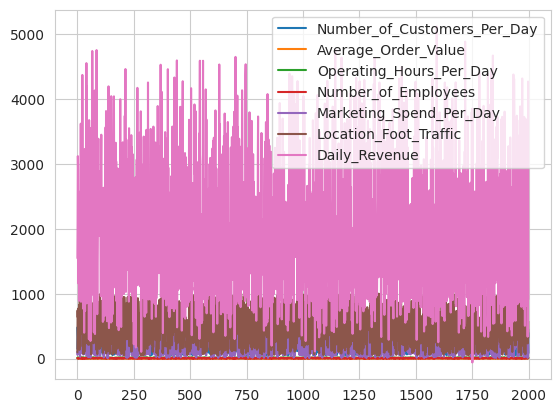

In [11]:
df.plot()         #General plot

In [ ]:
Univariate Analysis

Key Insights from the Univariate Analysis:
Number of Customers Per Day:

Mean: 274, Range: 50 to 499
Distribution appears roughly normal with a slight right skew.
Some lower values might indicate outliers.
Average Order Value:

Mean: $6.26, Range: $2.50 to $10.00
Appears to have a uniform or slightly right-skewed distribution.
Operating Hours Per Day:

Mean: 11.67 hours, Range: 6 to 17 hours
Mostly centered around typical working hours with some variance.
Number of Employees:

Mean: 7.95, Range: 2 to 14 employees.
The distribution seems normal but with some smaller coffee shops operating with very few employees.
Marketing Spend Per Day:

Mean: $252.61, Range: $10.12 to $499.74
Right-skewed distribution, indicating some shops invest significantly in marketing while others spend minimally.
Location Foot Traffic:

Mean: 534, Range: 50 to 999
Appears normally distributed but with a wide range of values.
Daily Revenue:

Mean: $1917.33, Range: -$58.95 to $5114.60
The negative revenue value suggests an outlier or data error.
Generally right-skewed, meaning some coffee shops make significantly higher revenue.

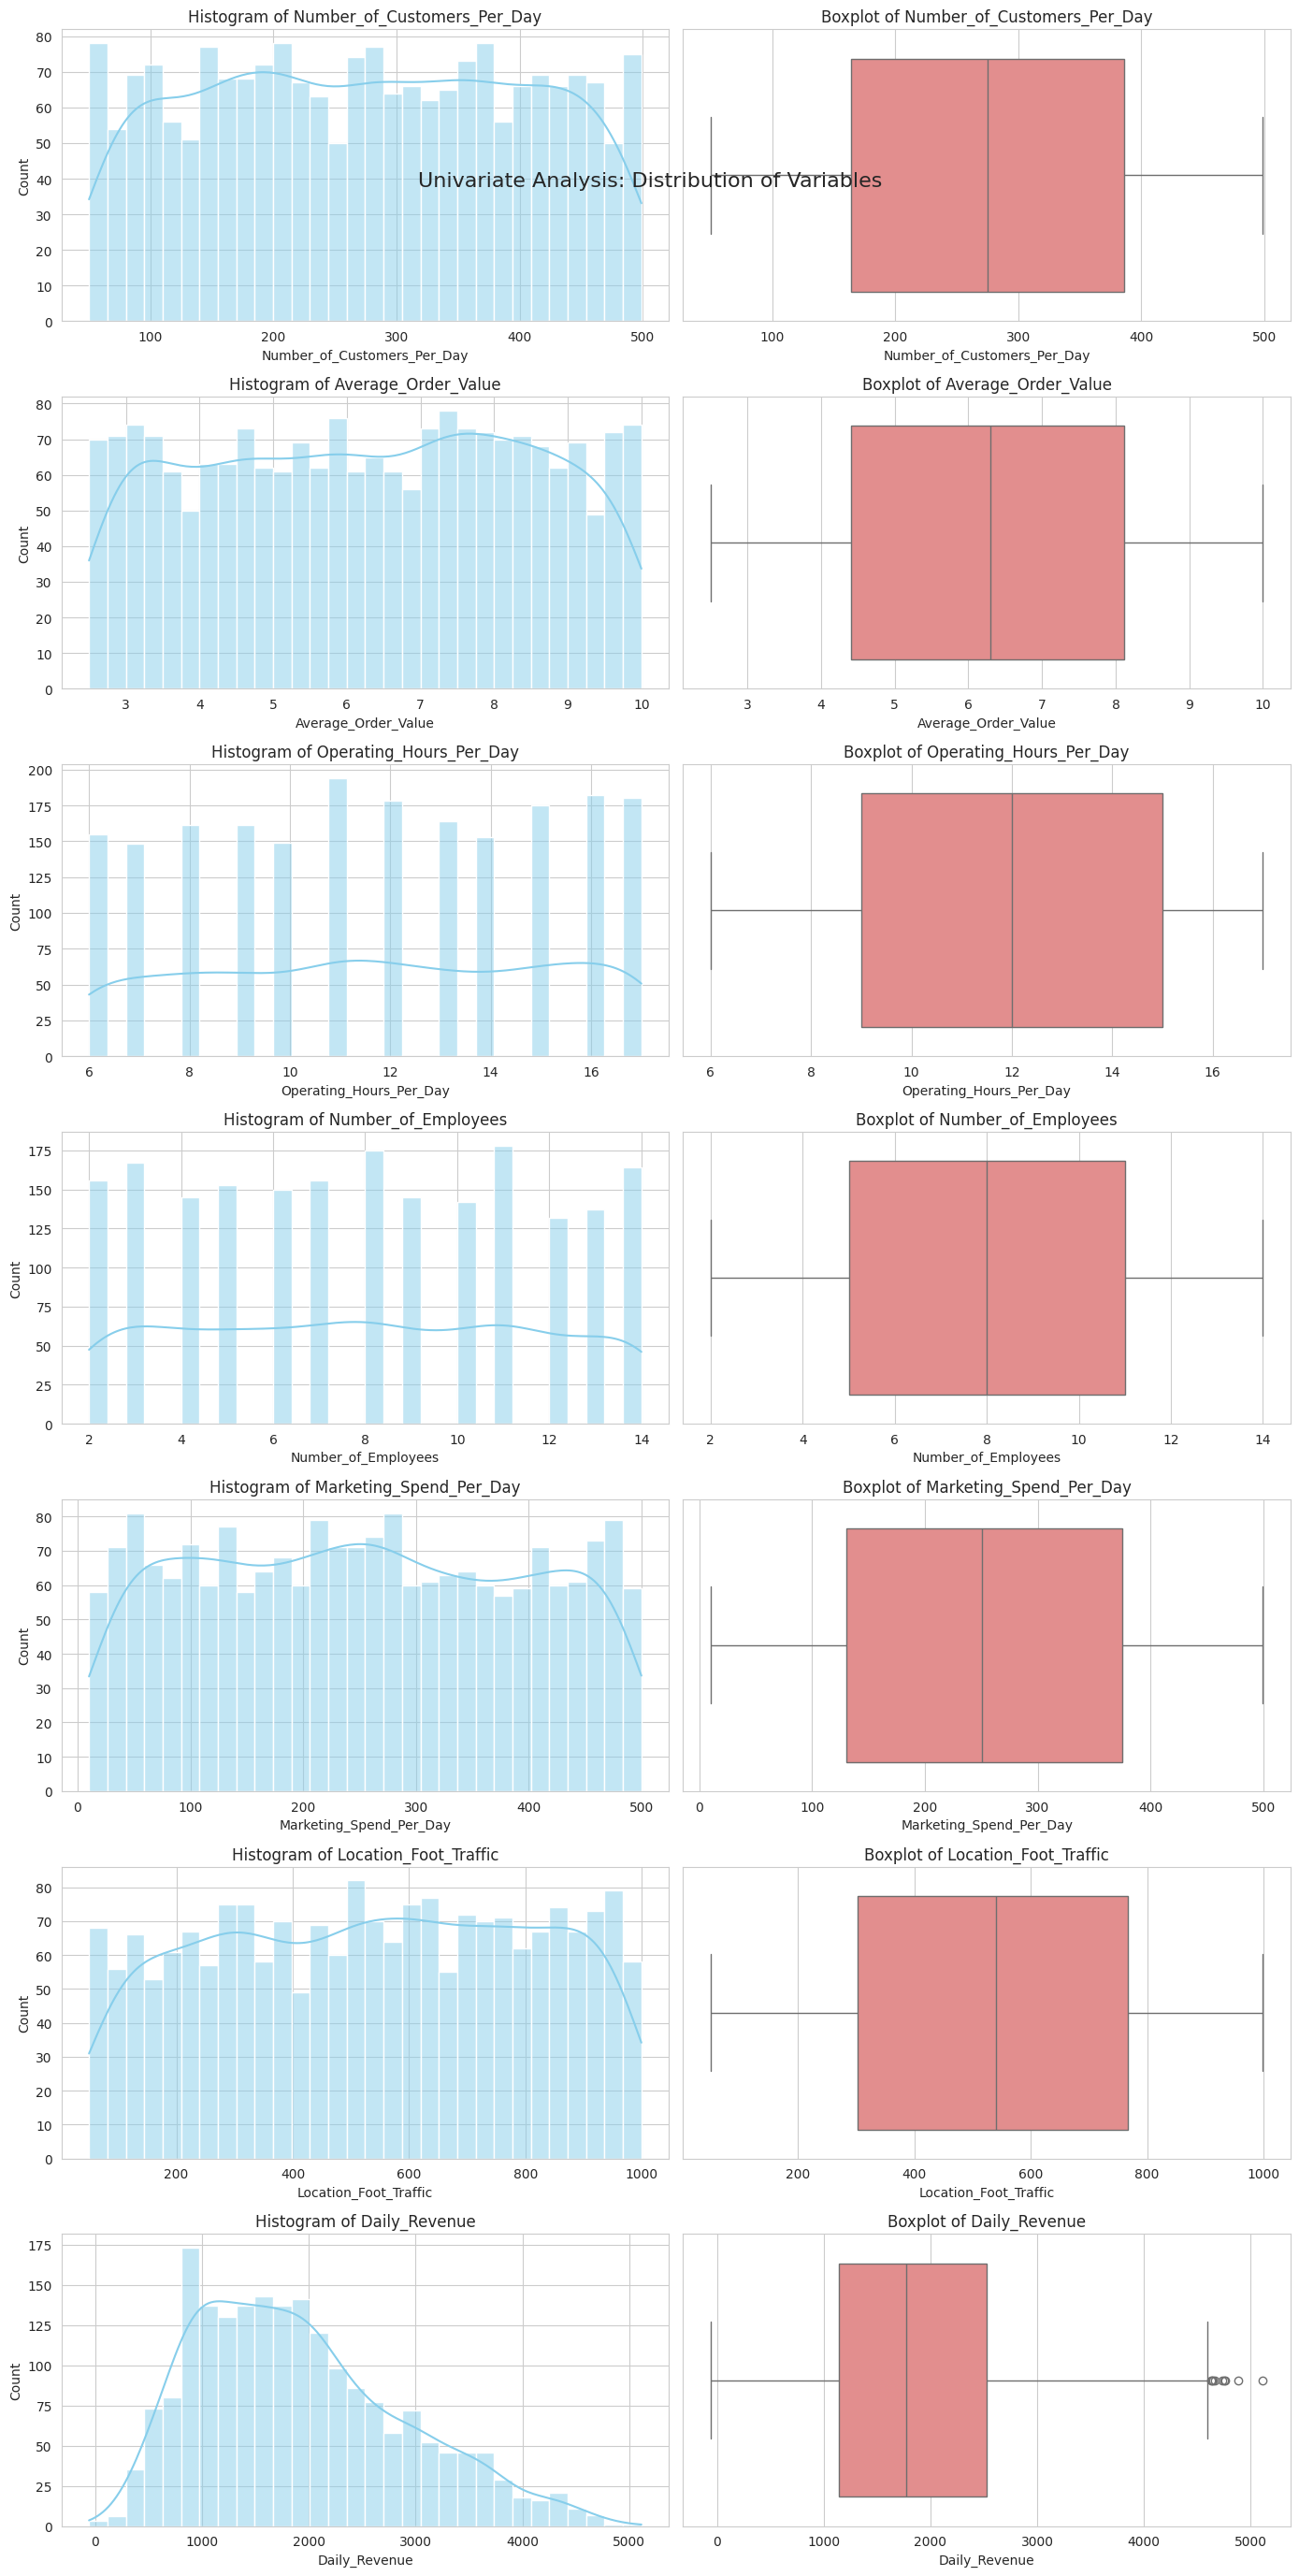

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [8]:
sns.set_style("whitegrid")

summary_stats = df.describe()

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
fig.suptitle("Univariate Analysis: Distribution of Variables", fontsize=16, y=0.92)

# Histogram and box plots

for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histogram of {column}")

    sns.boxplot(x=df[column], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

summary_stats

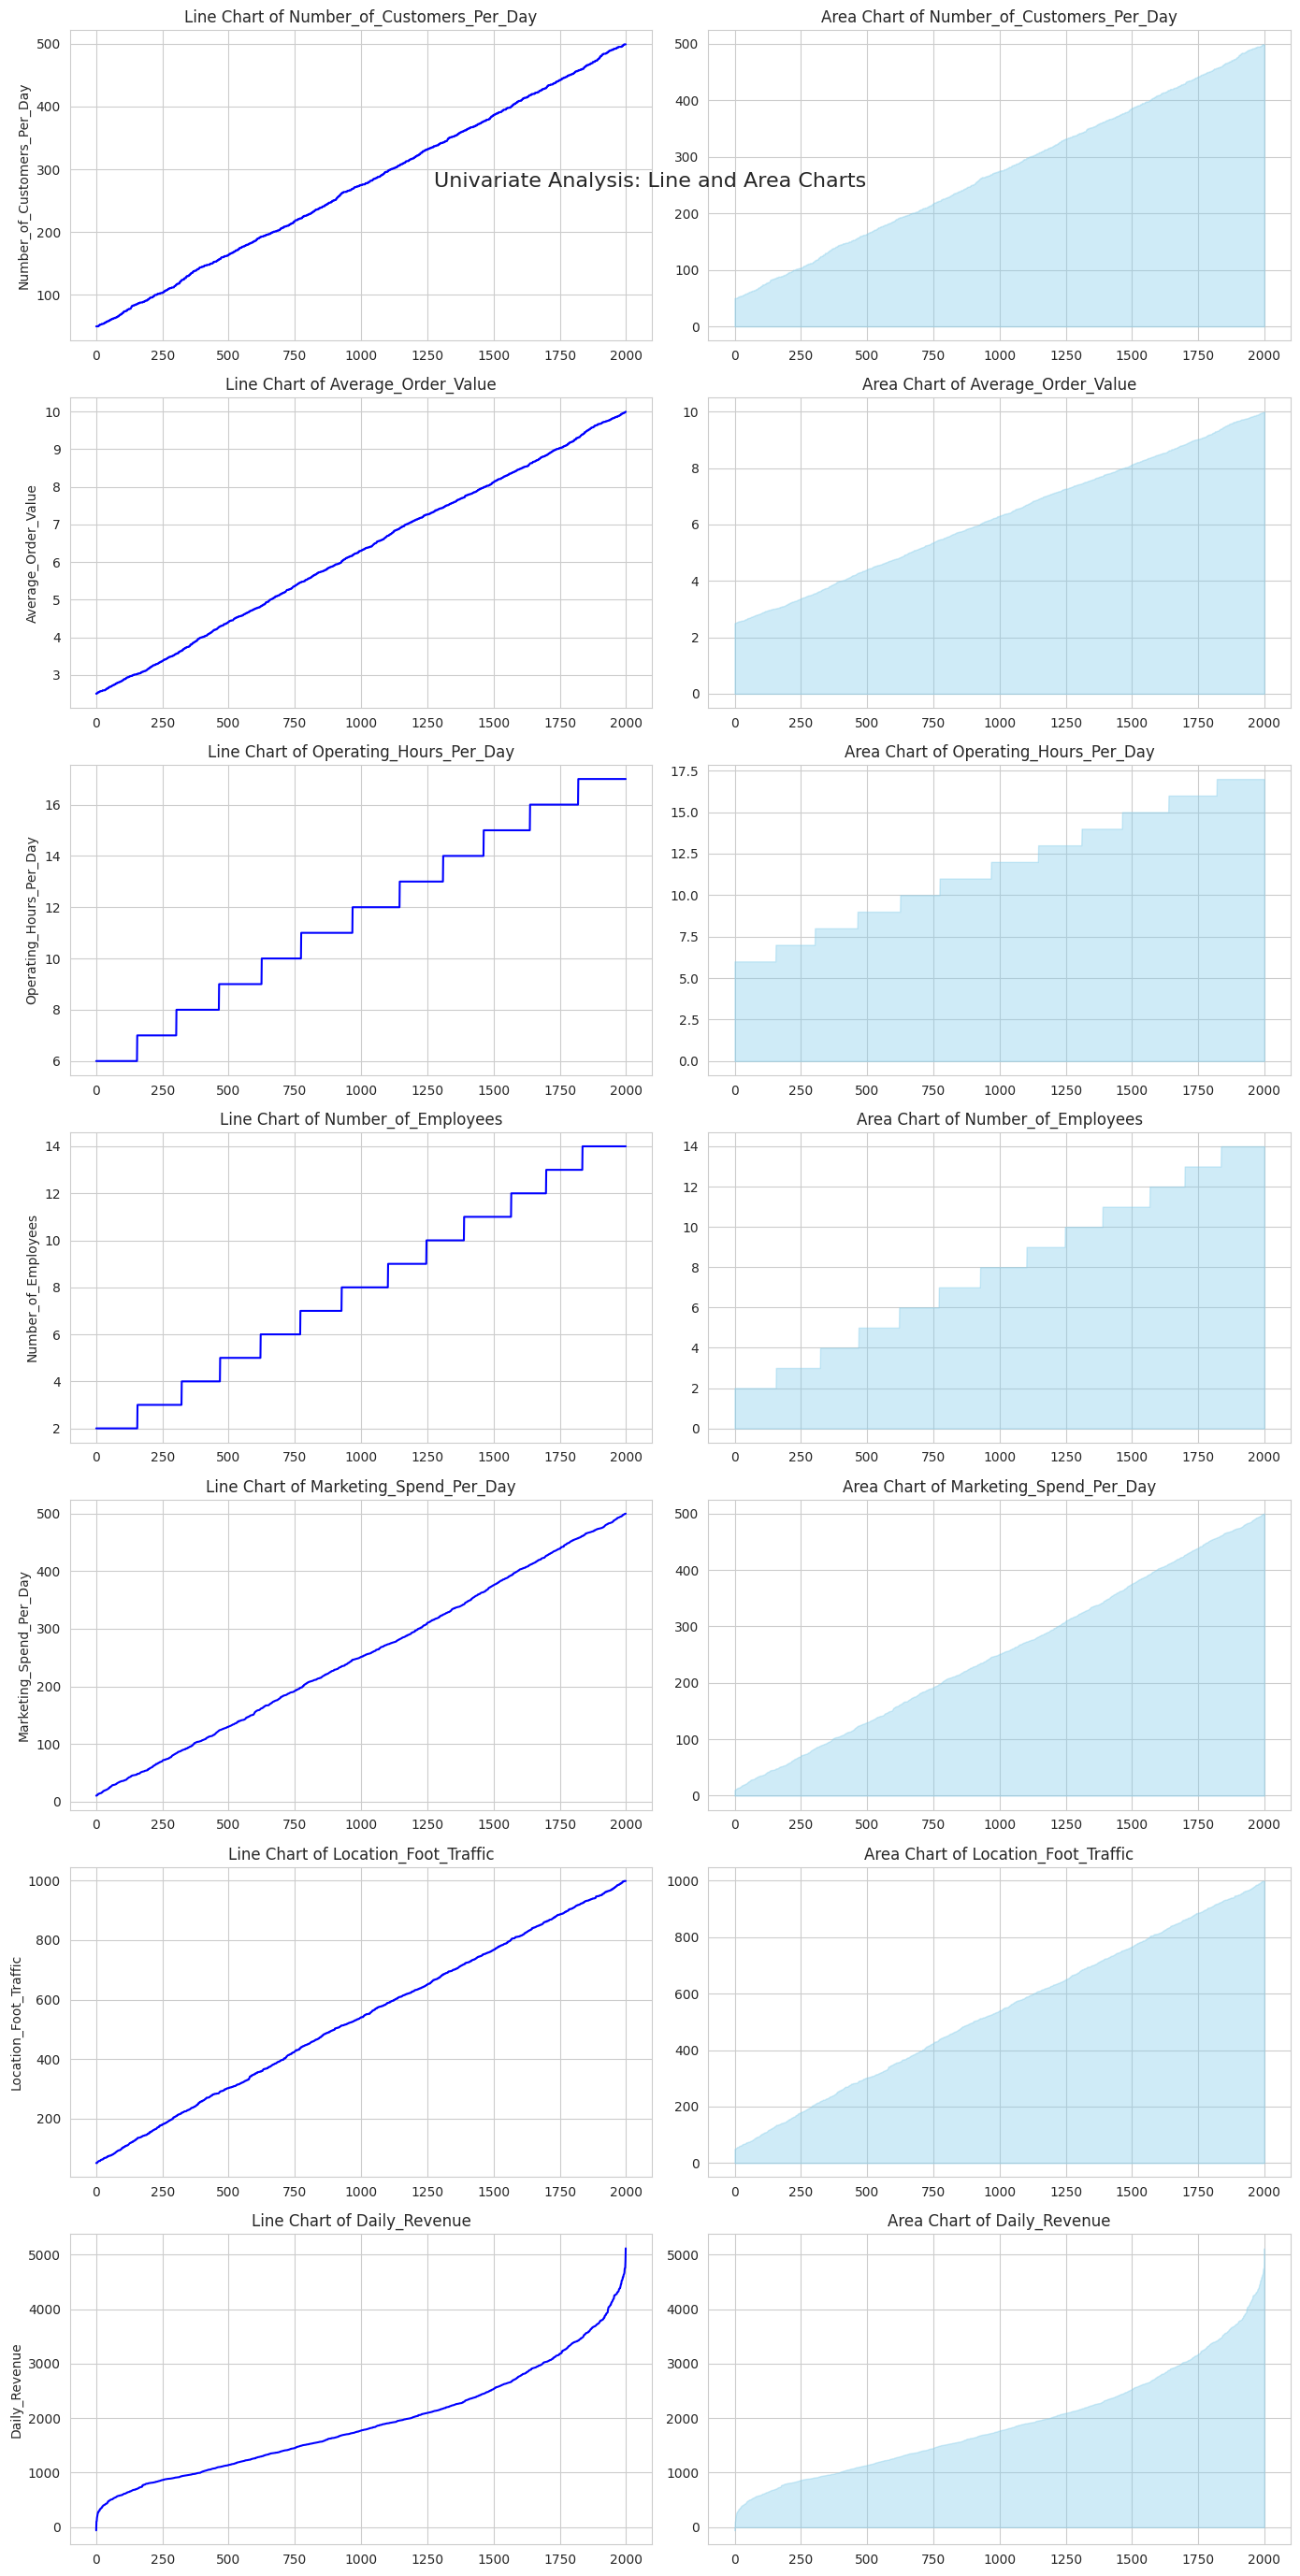

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
fig.suptitle("Univariate Analysis: Line and Area Charts", fontsize=16, y=0.92)

df_numeric = df.apply(pd.to_numeric, errors='coerce')

for i, column in enumerate(df_numeric.columns):
    sorted_values = df_numeric[column].sort_values().reset_index(drop=True).astype(float)

    # Line Plot
    sns.lineplot(data=sorted_values, ax=axes[i, 0], color="blue")
    axes[i, 0].set_title(f"Line Chart of {column}")

    # Area Plot
    axes[i, 1].fill_between(sorted_values.index, sorted_values.values, color="skyblue", alpha=0.4)
    axes[i, 1].set_title(f"Area Chart of {column}")

plt.tight_layout()
plt.show()


Multivariate Analysis

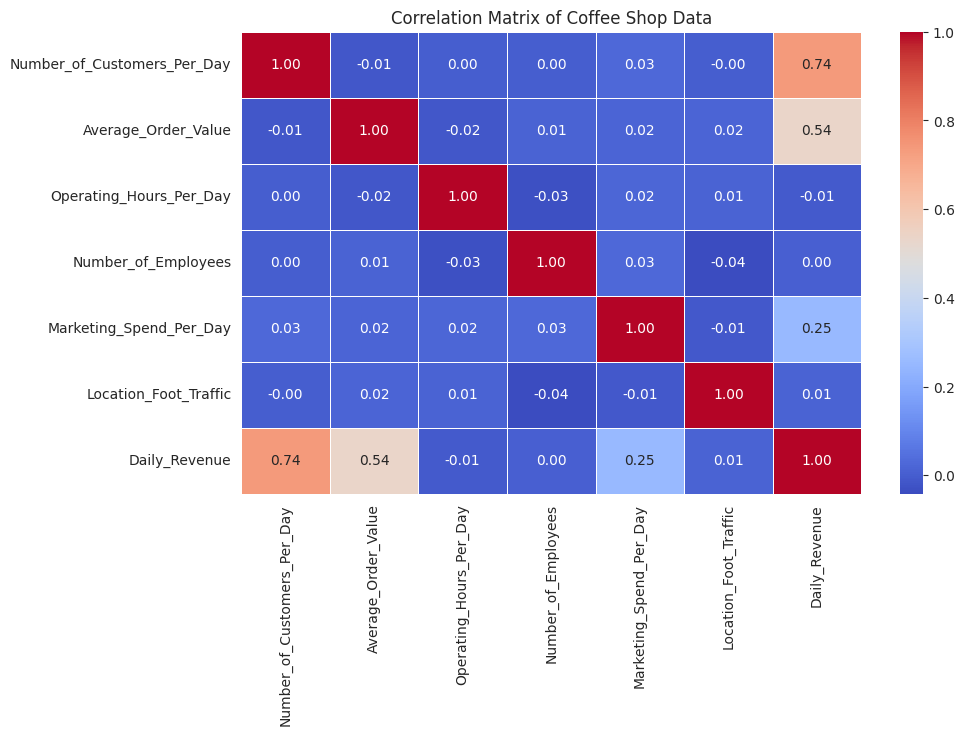

In [15]:
# Correlation matrix

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Coffee Shop Data")
plt.show()

Key Findings from Multiple Linear Regression:
R-squared = 0.892: The model explains 89.2% of the variance in daily revenue, indicating a strong fit.
Significant Predictors:
Number of Customers Per Day (coef = 5.568, p < 0.001): Strong positive impact on revenue.
Average Order Value (coef = 243.28, p < 0.001): Large effect—higher order values significantly increase revenue.
Marketing Spend (coef = 1.56, p < 0.001): Positive effect, suggesting marketing investments boost revenue.
Non-Significant Predictors (p > 0.05):
Operating Hours Per Day
Number of Employees
Location Foot Traffic
These variables don't significantly contribute to revenue after accounting for other factors.

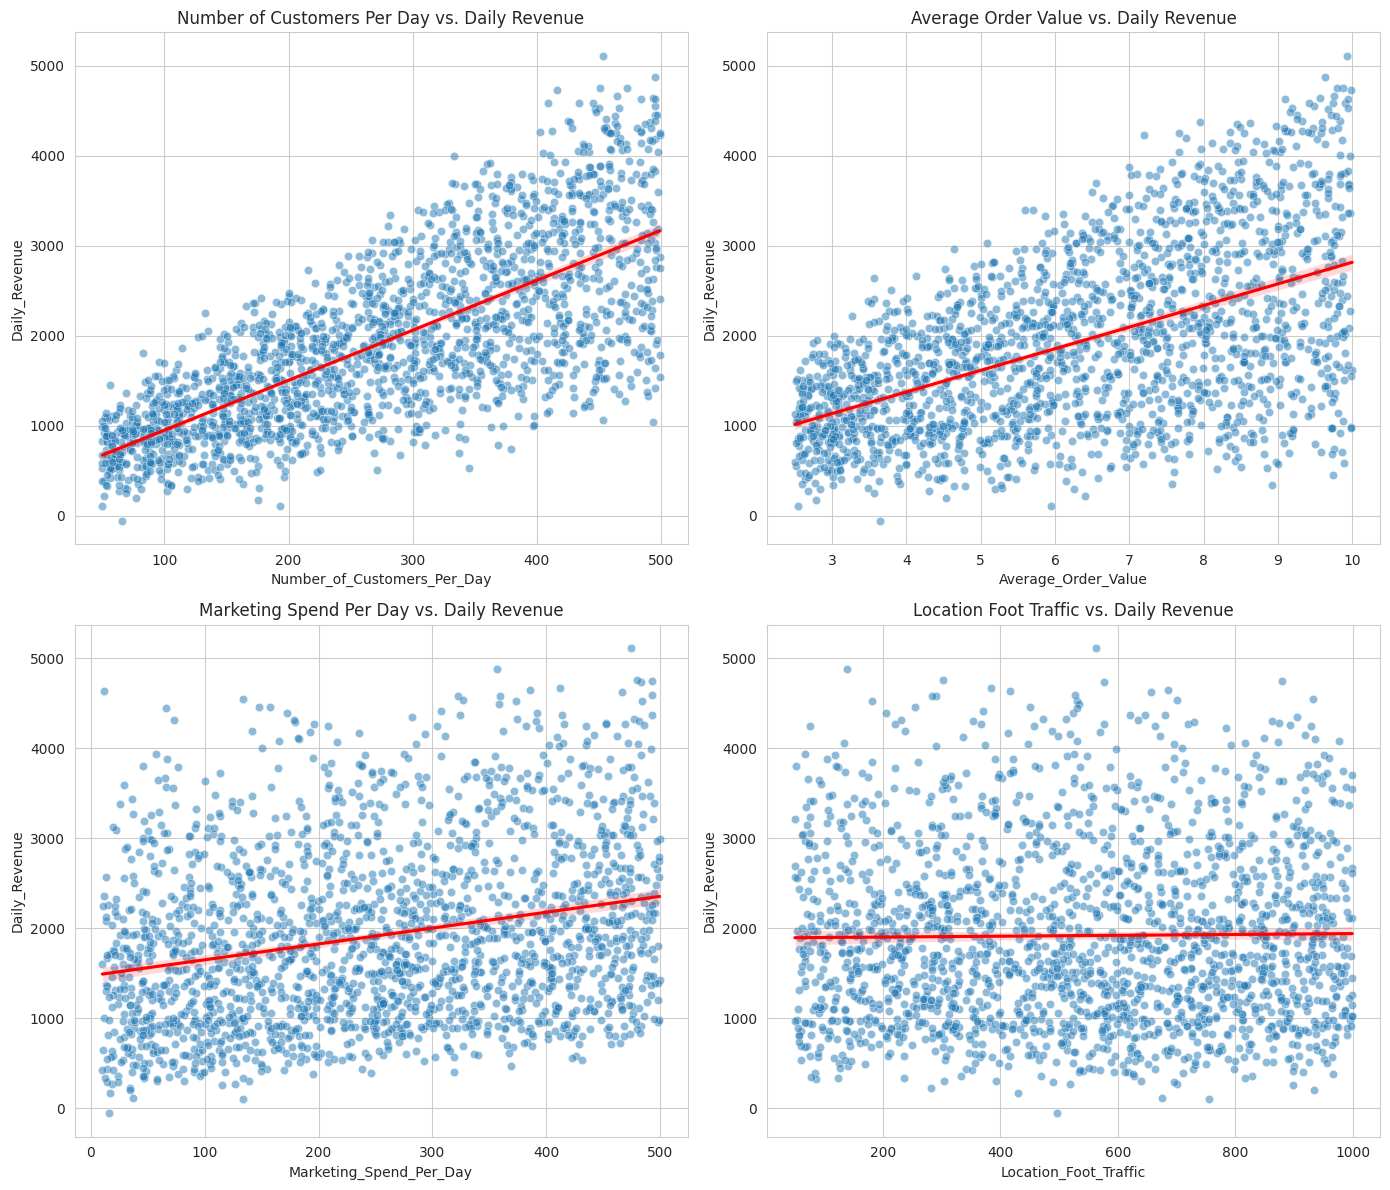

In [16]:
# Set up figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot 1: Number of Customers Per Day vs. Daily Revenue
sns.scatterplot(ax=axes[0, 0], x=df["Number_of_Customers_Per_Day"], y=df["Daily_Revenue"], alpha=0.5)
sns.regplot(ax=axes[0, 0], x=df["Number_of_Customers_Per_Day"], y=df["Daily_Revenue"], scatter=False, color="red")
axes[0, 0].set_title("Number of Customers Per Day vs. Daily Revenue")

# Scatter plot 2: Average Order Value vs. Daily Revenue
sns.scatterplot(ax=axes[0, 1], x=df["Average_Order_Value"], y=df["Daily_Revenue"], alpha=0.5)
sns.regplot(ax=axes[0, 1], x=df["Average_Order_Value"], y=df["Daily_Revenue"], scatter=False, color="red")
axes[0, 1].set_title("Average Order Value vs. Daily Revenue")

# Scatter plot 3: Marketing Spend Per Day vs. Daily Revenue
sns.scatterplot(ax=axes[1, 0], x=df["Marketing_Spend_Per_Day"], y=df["Daily_Revenue"], alpha=0.5)
sns.regplot(ax=axes[1, 0], x=df["Marketing_Spend_Per_Day"], y=df["Daily_Revenue"], scatter=False, color="red")
axes[1, 0].set_title("Marketing Spend Per Day vs. Daily Revenue")

# Scatter plot 4: Location Foot Traffic vs. Daily Revenue
sns.scatterplot(ax=axes[1, 1], x=df["Location_Foot_Traffic"], y=df["Daily_Revenue"], alpha=0.5)
sns.regplot(ax=axes[1, 1], x=df["Location_Foot_Traffic"], y=df["Daily_Revenue"], scatter=False, color="red")
axes[1, 1].set_title("Location Foot Traffic vs. Daily Revenue")

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
sns.pairplot(df, diag_kind="hist", plot_kws={'alpha': 0.5, 's': 15})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

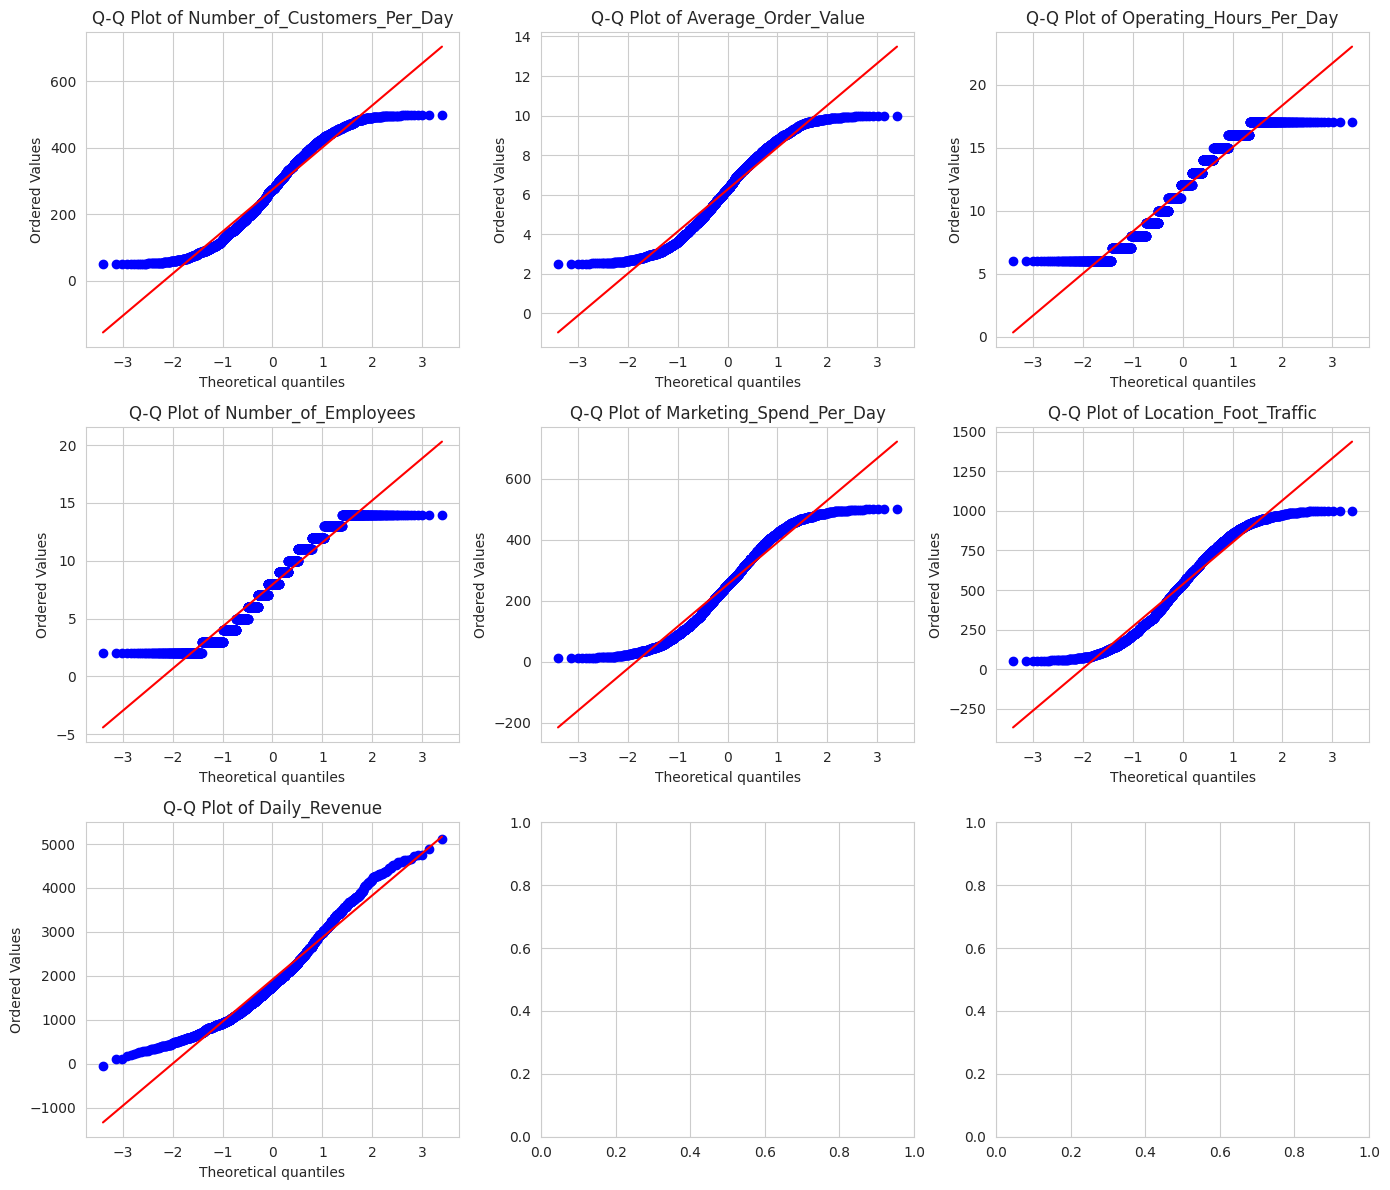

In [19]:
import scipy.stats as stats

# Set up the figure with subplots for each variable
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

# Plot Q-Q plots for each numerical variable
for i, column in enumerate(df.columns):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {column}")

# Adjust layout and remove empty subplots if any
plt.tight_layout()
plt.show()
